In [26]:
import pandas
import math
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
data_frame = pandas.read_csv('/content/titanic.csv')
data_frame = data_frame.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns')
data_frame.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [19]:
age_median = math.floor(data_frame['Age'].median())
data_frame['Age'] = data_frame['Age'].fillna(age_median)

In [20]:
label_encoder = LabelEncoder()
data_frame['Sex'] = label_encoder.fit_transform(data_frame['Sex'])

In [21]:
X = data_frame.drop(['Survived'], axis='columns')
y = data_frame['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
model.score(X_test, y_test)

0.7039106145251397

In [30]:
y_predict = model.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[77, 31],
       [22, 49]])

Text(95.72222222222221, 0.5, 'Truth')

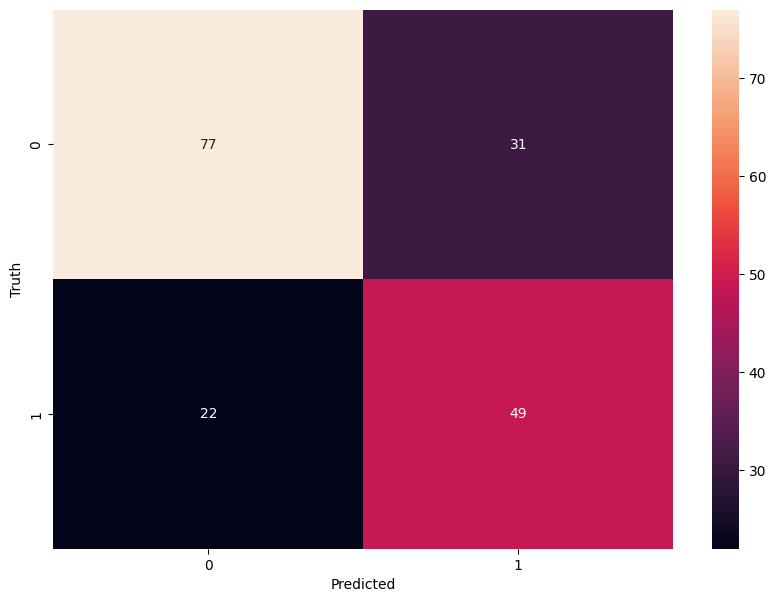

In [32]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')